<a href="https://colab.research.google.com/github/YazCodes/diabetes-prediction-DL/blob/main/diabetesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #need to convert labels - strings into boolean values etc 
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics

In [2]:

#Load training data 
df_train = pd.read_csv("/content/drive/MyDrive/hospitaltrain (1).csv")

#Load test data
df_test = pd.read_csv("/content/drive/MyDrive/hospitaltest (1).csv")

print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 668


,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#data set inforation

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   Class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [ ]:
df_train.describe()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


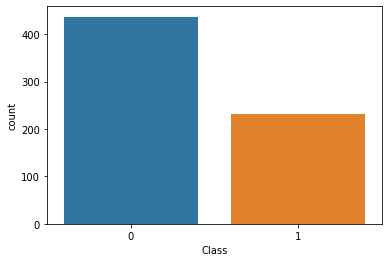

In [ ]:
# Summarise class details
sns.countplot(x=df_train['Class'])
#Class - 0 or 1 (1= tested positive for diabetes)

In [3]:
#Data pre-processing 
df_train.isnull().values.any() #No missing values 
#The data has a lot of 0 values. But it is not appropriate to use data cleaning to replace the 0 values in the A5 column. 
#As the A5 column represents the amount of insulin a patient has it would be wrong of us to replace the 0 values with a mean value. 
#We don't want to alter patient records.

#removing unnecessary columns
#x is training data it contains features and models - 'Class' is something we need to PREDICT therefore we need to drop that column 
X = df_train.drop(['Id', 'Class'], axis=1) #Class is not a feature it's just a label  axis = 1 shows we are using columns 
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
#Extracting labels and features 

#Extracting labels 
y= df_train['Class']
print(y.value_counts())

0    437
1    231
Name: Class, dtype: int64


In [ ]:
#Since the labels 0 and 1 are already are numerical values they do not need to be converted for the model.
#If the labels were in a catergorical state then you could use the label encoder to convert them

In [9]:
#MODEL ONE

#Using 8 features and 2 hidden layers 
#building the model - using training data 
#calculating if the probability is closer to 0 or 1 
X1 = X.iloc[:, 0:8] #locating part of the data frame the first 8 and call it X1 
X1.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
#Spliting the data into train (70%) and validation (30%)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100) #random state - regenerate the split again 
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


In [ ]:
#Building model One

# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu')) #Defining our hidden layer - adding the layers to the model, a dence layer, 12 neurons, we selected 8 features so 8 input dimentions .
model1.add(Dense(8, activation='relu')) #second hidden layer
#using relu for hidden layers not for output layers 
model1.add(Dense(1, activation='sigmoid')) #creating our output layer with one neurone 

model1.summary()

#parameters = the total of weights and bias 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model one - part 1
#model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1)) #change depending on your dataset  batch_size and epochs- you have to look at the accuracy of the dataset 

#Epoch 60/60
#10/10 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6782 - val_loss: 0.6478 - val_accuracy: 0.6716

Epoch 1/60
10/10 [==============================] - 1s 31ms/step - loss: 3.7418 - accuracy: 0.3991 - val_loss: 2.4649 - val_accuracy: 0.4428
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 3.4980 - accuracy: 0.4369 - val_loss: 2.0681 - val_accuracy: 0.4279
Epoch 3/60
10/10 [==============================] - 0s 5ms/step - loss: 2.5355 - accuracy: 0.4316 - val_loss: 1.7451 - val_accuracy: 0.4478
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 1.9790 - accuracy: 0.4600 - val_loss: 1.4849 - val_accuracy: 0.4428
Epoch 5/60
10/10 [==============================] - 0s 7ms/step - loss: 2.0643 - accuracy: 0.4625 - val_loss: 1.3298 - val_accuracy: 0.4478
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 1.5816 - accuracy: 0.4646 - val_loss: 1.2303 - val_accuracy: 0.4577
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 1.3786 - accuracy: 0.4792 - val_loss: 1.1309 - val_accuracy: 0.4726
Epoch 8/60
10/10 [=

In [ ]:
#Train model one part 2 
#model1.fit(X_train1, y_train1, batch_size=40, epochs=50, validation_data=(X_val1, y_val1)) #change depending on your dataset  batch_size and epochs- you have to look at the accuracy of the dataset 

Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5927 - accuracy: 0.6809 - val_loss: 0.6664 - val_accuracy: 0.6418
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5866 - accuracy: 0.6959 - val_loss: 0.6439 - val_accuracy: 0.6617
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5880 - accuracy: 0.6895 - val_loss: 0.6651 - val_accuracy: 0.6368
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.7024 - val_loss: 0.6347 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6895 - val_loss: 0.6927 - val_accuracy: 0.6368
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6023 - accuracy: 0.6874 - val_loss: 0.6353 - val_accuracy: 0.6617
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6075 - accuracy: 0.6959 - val_loss: 0.6375 - val_accuracy: 0.6617
Epoch 8/50
12/12 [=

In [ ]:
# train model one part 3 - The optimum number of batch size and epochs for the parameters of model one

#batch size refers to the number of samples that will be spread within the network.
#It all depends on your data set size
#batch size set to 60 = the algorithm takes the first 60 samples from the training dataset to train the network
#Pros - using a batch size smaller than the sample size is that it uses less memory, the networks will train faster
#Cons - of using a < batch size will result in a decrease in the accuracy of the gradient. 

#Epoch - one forward pass and one background pass of all the training data aka one full cycle through the training set
model1.fit(X_train1, y_train1, batch_size=60, epochs=70, validation_data=(X_val1, y_val1)) 

Epoch 1/70
8/8 [==============================] - 0s 16ms/step - loss: 0.5391 - accuracy: 0.7173 - val_loss: 0.5970 - val_accuracy: 0.6965
Epoch 2/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5370 - accuracy: 0.7152 - val_loss: 0.5974 - val_accuracy: 0.6915
Epoch 3/70
8/8 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.7173 - val_loss: 0.5990 - val_accuracy: 0.6766
Epoch 4/70
8/8 [==============================] - 0s 6ms/step - loss: 0.5386 - accuracy: 0.7109 - val_loss: 0.5890 - val_accuracy: 0.7015
Epoch 5/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5358 - accuracy: 0.7345 - val_loss: 0.6005 - val_accuracy: 0.6716
Epoch 6/70
8/8 [==============================] - 0s 8ms/step - loss: 0.5369 - accuracy: 0.7259 - val_loss: 0.5915 - val_accuracy: 0.7015
Epoch 7/70
8/8 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.7152 - val_loss: 0.5974 - val_accuracy: 0.6766
Epoch 8/70
8/8 [=================

In [ ]:
# get model predictions for validation data
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.39571267]
 [0.6151204 ]
 [0.25974202]
 [0.29754144]
 [0.6689728 ]
 [0.07901052]
 [0.45796472]
 [0.25729826]
 [0.49921706]
 [0.19692037]]


In [ ]:
y_pred_categorical1 = []
for pred in y_pred1:
  if pred > 0.5:
    y_pred_categorical1.append(1)
  else:
    y_pred_categorical1.append(0)
  

print(y_pred_categorical1[:10])

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7064676616915423


In [ ]:
# Test predictions 
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
test_pred = model1.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

[[6.1670500e-01]
 [4.0108013e-01]
 [5.5382913e-01]
 [3.6843187e-01]
 [7.4215233e-02]
 [3.1066418e-01]
 [3.8011372e-02]
 [8.7752426e-01]
 [3.6958769e-01]
 [3.3615547e-01]
 [5.8491218e-01]
 [5.1153076e-01]
 [1.9247583e-01]
 [6.8173057e-01]
 [2.2306883e-01]
 [4.2488885e-01]
 [2.1788073e-01]
 [5.6389308e-01]
 [4.4475320e-01]
 [4.2440104e-01]
 [5.8358949e-01]
 [4.3531960e-01]
 [2.7281338e-01]
 [4.1215789e-01]
 [2.3370531e-01]
 [5.0952250e-01]
 [2.9193351e-01]
 [6.9836164e-01]
 [3.7749407e-01]
 [6.7842388e-01]
 [2.5988436e-01]
 [5.0237584e-01]
 [5.0591540e-01]
 [2.6176292e-01]
 [4.9230459e-01]
 [7.2806209e-02]
 [2.5834864e-01]
 [1.5262809e-01]
 [2.2357702e-04]
 [4.6244460e-01]
 [3.7376133e-01]
 [3.8505986e-01]
 [6.7009068e-01]
 [5.8048785e-02]
 [5.1456678e-01]
 [5.6728077e-01]
 [2.6953053e-01]
 [7.1896064e-01]
 [6.4362508e-01]
 [2.0246115e-01]
 [6.0327101e-01]
 [1.8403277e-01]
 [6.9309115e-02]
 [5.7909638e-01]
 [4.0243250e-01]
 [2.0683786e-01]
 [1.6896915e-01]
 [4.2605686e-01]
 [4.2179465e-0

**Model Two** 

In [5]:
#Building model Two

# define the keras model
model2 = Sequential()
model2.add(Dense(64, input_dim=8, activation='relu')) #Defining our hidden layer - adding the layers to the model, a dence layer, 64 neurons, we selected 8 features so 8 input dimentions .
model2.add(Dense(8, activation='relu')) #second hidden layer
#using relu for hidden layers not for output layers 
model2.add(Dense(1, activation='sigmoid')) #creating our output layer with one neurone 

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model2.fit(X_train1, y_train1, batch_size=60, epochs=70, validation_data=(X_val1, y_val1)) 

Epoch 1/70
8/8 [==============================] - 1s 35ms/step - loss: 6.1700 - accuracy: 0.6023 - val_loss: 3.7457 - val_accuracy: 0.3582
Epoch 2/70
8/8 [==============================] - 0s 7ms/step - loss: 3.4139 - accuracy: 0.4105 - val_loss: 2.3722 - val_accuracy: 0.4776
Epoch 3/70
8/8 [==============================] - 0s 7ms/step - loss: 2.3987 - accuracy: 0.5652 - val_loss: 2.0555 - val_accuracy: 0.6020
Epoch 4/70
8/8 [==============================] - 0s 23ms/step - loss: 1.5401 - accuracy: 0.5865 - val_loss: 1.6809 - val_accuracy: 0.4129
Epoch 5/70
8/8 [==============================] - 0s 7ms/step - loss: 1.4902 - accuracy: 0.5244 - val_loss: 1.4491 - val_accuracy: 0.6020
Epoch 6/70
8/8 [==============================] - 0s 6ms/step - loss: 1.2123 - accuracy: 0.6115 - val_loss: 1.1655 - val_accuracy: 0.4826
Epoch 7/70
8/8 [==============================] - 0s 6ms/step - loss: 1.1113 - accuracy: 0.5370 - val_loss: 1.0525 - val_accuracy: 0.5871
Epoch 8/70
8/8 [================

In [11]:
model2.fit(X_train1, y_train1, batch_size=100, epochs=70, validation_data=(X_val1, y_val1)) #Optimum model 

Epoch 1/70
5/5 [==============================] - 1s 73ms/step - loss: 3.3799 - accuracy: 0.5892 - val_loss: 2.6843 - val_accuracy: 0.5174
Epoch 2/70
5/5 [==============================] - 0s 13ms/step - loss: 2.2144 - accuracy: 0.5139 - val_loss: 1.5292 - val_accuracy: 0.6318
Epoch 3/70
5/5 [==============================] - 0s 12ms/step - loss: 1.7470 - accuracy: 0.5557 - val_loss: 1.2471 - val_accuracy: 0.7015
Epoch 4/70
5/5 [==============================] - 0s 11ms/step - loss: 1.3687 - accuracy: 0.5707 - val_loss: 1.2333 - val_accuracy: 0.6816
Epoch 5/70
5/5 [==============================] - 0s 45ms/step - loss: 1.3139 - accuracy: 0.6342 - val_loss: 1.1021 - val_accuracy: 0.6866
Epoch 6/70
5/5 [==============================] - 0s 12ms/step - loss: 1.2641 - accuracy: 0.6400 - val_loss: 0.9088 - val_accuracy: 0.6667
Epoch 7/70
5/5 [==============================] - 0s 12ms/step - loss: 1.0520 - accuracy: 0.6289 - val_loss: 0.8595 - val_accuracy: 0.6766
Epoch 8/70
5/5 [===========

In [ ]:
#model2.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1)) 

Epoch 1/60
10/10 [==============================] - 0s 12ms/step - loss: 0.4892 - accuracy: 0.7473 - val_loss: 0.6024 - val_accuracy: 0.7164
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5611 - accuracy: 0.7216 - val_loss: 0.6033 - val_accuracy: 0.6915
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7473 - val_loss: 0.6226 - val_accuracy: 0.6816
Epoch 4/60
10/10 [==============================] - 0s 7ms/step - loss: 0.5065 - accuracy: 0.7430 - val_loss: 0.6871 - val_accuracy: 0.6517
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5208 - accuracy: 0.7516 - val_loss: 0.6022 - val_accuracy: 0.6965
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5025 - accuracy: 0.7409 - val_loss: 0.5550 - val_accuracy: 0.7264
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5052 - accuracy: 0.7345 - val_loss: 0.5686 - val_accuracy: 0.7065
Epoch 8/60
10/10 [=

In [13]:
# get model predictions for validation data
y_pred2 = model2.predict(X_val1)
print(y_pred2[:10])

[[4.4061700e-01]
 [3.5600543e-02]
 [3.9253354e-01]
 [2.8376374e-01]
 [7.4988711e-01]
 [2.2759652e-07]
 [6.1351818e-01]
 [1.7568830e-01]
 [6.1033583e-01]
 [3.6573350e-02]]


In [15]:
y_pred_categorical2 = []
for pred in y_pred2:
  if pred > 0.5:
    y_pred_categorical2.append(1)
  else:
    y_pred_categorical2.append(0)
  

print(y_pred_categorical2[:10])

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [17]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7114427860696517


Model **three**

In [18]:
#Building model Three

# define the keras model
model3 = Sequential()
model3.add(Dense(64, input_dim=8, activation='relu')) #Defining our hidden layer - adding the layers to the model, a dence layer, 64 neurons, we selected 8 features so 8 input dimentions .
model3.add(Dense(8, activation='relu')) #second hidden layer
model3.add(Dense(8, activation='relu')) #3rd hidden layer

model3.add(Dense(8, activation='relu')) #4th hidden layer


#using relu for hidden layers not for output layers 
model3.add(Dense(1, activation='sigmoid')) #creating our output layer with one neurone 

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model3.fit(X_train1, y_train1, batch_size=60, epochs=70, validation_data=(X_val1, y_val1)) - The better one 

Epoch 1/70
8/8 [==============================] - 1s 31ms/step - loss: 12.1224 - accuracy: 0.6482 - val_loss: 5.7709 - val_accuracy: 0.6617
Epoch 2/70
8/8 [==============================] - 0s 8ms/step - loss: 5.2096 - accuracy: 0.6517 - val_loss: 3.2653 - val_accuracy: 0.5174
Epoch 3/70
8/8 [==============================] - 0s 8ms/step - loss: 2.9699 - accuracy: 0.5145 - val_loss: 1.9802 - val_accuracy: 0.5124
Epoch 4/70
8/8 [==============================] - 0s 7ms/step - loss: 1.6022 - accuracy: 0.5509 - val_loss: 1.1803 - val_accuracy: 0.6368
Epoch 5/70
8/8 [==============================] - 0s 7ms/step - loss: 1.2775 - accuracy: 0.5720 - val_loss: 0.8644 - val_accuracy: 0.6716
Epoch 6/70
8/8 [==============================] - 0s 7ms/step - loss: 0.9087 - accuracy: 0.6497 - val_loss: 0.8870 - val_accuracy: 0.6468
Epoch 7/70
8/8 [==============================] - 0s 7ms/step - loss: 0.9764 - accuracy: 0.6351 - val_loss: 0.7945 - val_accuracy: 0.6418
Epoch 8/70
8/8 [================

In [ ]:
#model3.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1)) 

Epoch 1/60
10/10 [==============================] - 0s 13ms/step - loss: 0.5329 - accuracy: 0.7195 - val_loss: 0.5806 - val_accuracy: 0.7264
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5152 - accuracy: 0.7345 - val_loss: 0.5938 - val_accuracy: 0.7015
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5245 - accuracy: 0.7430 - val_loss: 0.5636 - val_accuracy: 0.7463
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5265 - accuracy: 0.7238 - val_loss: 0.5591 - val_accuracy: 0.7463
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5152 - accuracy: 0.7452 - val_loss: 0.6481 - val_accuracy: 0.6766
Epoch 6/60
10/10 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7302 - val_loss: 0.5675 - val_accuracy: 0.7363
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 0.5383 - accuracy: 0.7066 - val_loss: 0.5736 - val_accuracy: 0.7114
Epoch 8/60
10/10 [=

In [ ]:
#model3.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1)) #better one so far 

Epoch 1/60
10/10 [==============================] - 1s 23ms/step - loss: 3.7131 - accuracy: 0.6666 - val_loss: 0.9978 - val_accuracy: 0.6368
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.8182 - accuracy: 0.6409 - val_loss: 0.6607 - val_accuracy: 0.6517
Epoch 3/60
10/10 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.6728 - val_loss: 0.6799 - val_accuracy: 0.6517
Epoch 4/60
10/10 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6607 - val_loss: 0.6746 - val_accuracy: 0.6318
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6541 - accuracy: 0.6683 - val_loss: 0.6653 - val_accuracy: 0.6468
Epoch 6/60
10/10 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.6312 - val_loss: 0.6612 - val_accuracy: 0.6468
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.6761 - val_loss: 0.6591 - val_accuracy: 0.6567
Epoch 8/60
10/10 [=

In [20]:
model3.fit(X_train1, y_train1, batch_size=60, epochs=70, validation_data=(X_val1, y_val1)) #better one so far 

Epoch 1/70
8/8 [==============================] - 1s 35ms/step - loss: 1.2280 - accuracy: 0.5676 - val_loss: 0.8210 - val_accuracy: 0.4179
Epoch 2/70
8/8 [==============================] - 0s 8ms/step - loss: 0.7509 - accuracy: 0.5632 - val_loss: 0.7184 - val_accuracy: 0.6567
Epoch 3/70
8/8 [==============================] - 0s 9ms/step - loss: 0.7200 - accuracy: 0.6388 - val_loss: 0.6852 - val_accuracy: 0.5672
Epoch 4/70
8/8 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.5611 - val_loss: 0.6583 - val_accuracy: 0.6617
Epoch 5/70
8/8 [==============================] - 0s 11ms/step - loss: 0.6628 - accuracy: 0.6770 - val_loss: 0.6539 - val_accuracy: 0.6517
Epoch 6/70
8/8 [==============================] - 0s 10ms/step - loss: 0.6255 - accuracy: 0.6773 - val_loss: 0.6417 - val_accuracy: 0.6816
Epoch 7/70
8/8 [==============================] - 0s 8ms/step - loss: 0.6165 - accuracy: 0.6960 - val_loss: 0.6274 - val_accuracy: 0.7015
Epoch 8/70
8/8 [===============

In [21]:
# get model predictions for validation data
y_pred3 = model3.predict(X_val1)
print(y_pred3[:10])

[[0.30680233]
 [0.502591  ]
 [0.40875232]
 [0.28097302]
 [0.52724844]
 [0.00419253]
 [0.4450607 ]
 [0.21976706]
 [0.6424153 ]
 [0.08760211]]


In [22]:
y_pred_categorical3 = []
for pred in y_pred3:
  if pred > 0.5:
    y_pred_categorical3.append(1)
  else:
    y_pred_categorical3.append(0)
  

print(y_pred_categorical3[:10])

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]


In [23]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical3)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7313432835820896


**Test** **preformance**

In [24]:
# Test predictions 
# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [26]:
test_pred = model3.predict(X_test) #Test predictions using model 3 
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

final_predictions = test_pred

df_submission = pd.DataFrame(df_test['Id'])
df_submission['Class'] = final_predictions

# save data frame to .csv file
df_submission.to_csv('/content/test-predictions.csv', index=False)


[[0.6906524 ]
 [0.31238183]
 [0.60296506]
 [0.37187183]
 [0.01306203]
 [0.46803492]
 [0.0869478 ]
 [0.5675461 ]
 [0.28984487]
 [0.34823263]
 [0.5196429 ]
 [0.43518776]
 [0.06853339]
 [0.54215217]
 [0.34538785]
 [0.33629525]
 [0.01573771]
 [0.4401108 ]
 [0.45422408]
 [0.41002953]
 [0.41519907]
 [0.52424   ]
 [0.18805614]
 [0.25316644]
 [0.2410121 ]
 [0.48656923]
 [0.23147893]
 [0.47148883]
 [0.38266888]
 [0.5085595 ]
 [0.36231074]
 [0.5041066 ]
 [0.43163323]
 [0.20389533]
 [0.37828946]
 [0.5539669 ]
 [0.13510749]
 [0.11081085]
 [0.23610139]
 [0.63543314]
 [0.46848089]
 [0.48458698]
 [0.5564433 ]
 [0.21412447]
 [0.48004296]
 [0.5135564 ]
 [0.1806657 ]
 [0.87241066]
 [0.5588118 ]
 [0.22877303]
 [0.5529633 ]
 [0.19389689]
 [0.03673637]
 [0.50957054]
 [0.40030187]
 [0.17186755]
 [0.04777482]
 [0.18959412]
 [0.38853663]
 [0.403206  ]
 [0.458217  ]
 [0.4194145 ]
 [0.10546258]
 [0.2473926 ]
 [0.33029604]
 [0.48065692]
 [0.13584304]
 [0.29131895]
 [0.08443084]
 [0.12442434]
 [0.4604286 ]
 [0.18

N is number of hidden neurons-

N = 2/3 the size of the input layer, plus the size of the output layer.
N < twice the size of the input layer